### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



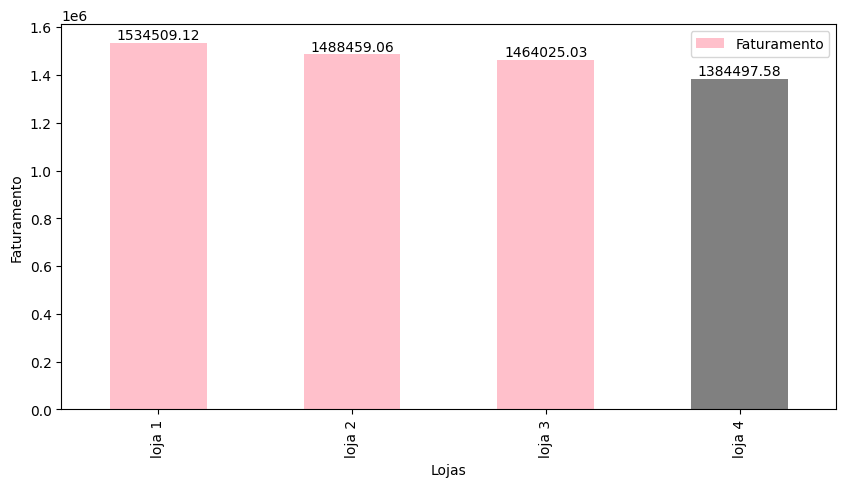

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Re-load 'loja' as a DataFrame because it seems to have been overwritten
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
loja = pd.read_csv(url)

faturametento_total = loja['Preço'].sum()
faturametento_total2 = loja2['Preço'].sum()
faturametento_total3 = loja3['Preço'].sum()
faturametento_total4 = loja4['Preço'].sum()

faturamento = {
    'loja 1': faturametento_total,
    'loja 2': faturametento_total2,
    'loja 3': faturametento_total3,
    'loja 4': faturametento_total4
}

lojas_faturamento = pd.DataFrame(
    list(faturamento.items()),
    columns=['Loja', 'Faturamento']
)

# Identifica o menor faturamento
menor_faturamento = lojas_faturamento['Faturamento'].min()

# Define as cores:
cores = [
    'gray' if valor == menor_faturamento else 'pink'
    for valor in lojas_faturamento['Faturamento']
]

# Gráfico de colunas VERTICAIS
ax = lojas_faturamento.plot(
    x='Loja',
    y='Faturamento',
    kind='bar',
    figsize=(10,5),
    color=cores
)

# Adicionando os valores no topo das colunas
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')

ax.set_xlabel('Lojas')
ax.set_ylabel('Faturamento')

plt.show()

# 2. Vendas por Categoria

In [ ]:

vendas_por_categoria = loja['Categoria do Produto'].value_counts()
vendas_por_categoria



,count
Categoria do Produto,
moveis,465
eletronicos,448
brinquedos,324
eletrodomesticos,312
esporte e lazer,284
instrumentos musicais,182
livros,173
utilidades domesticas,171


In [ ]:

vendas_por_categoria2 = loja2['Categoria do Produto'].value_counts()
vendas_por_categoria2

,count
Categoria do Produto,
moveis,442
eletronicos,422
brinquedos,313
eletrodomesticos,305
esporte e lazer,275
instrumentos musicais,224
livros,197
utilidades domesticas,181


In [ ]:

vendas_por_categoria3 = loja3['Categoria do Produto'].value_counts()
vendas_por_categoria3

,count
Categoria do Produto,
moveis,499
eletronicos,451
brinquedos,315
eletrodomesticos,278
esporte e lazer,277
livros,185
instrumentos musicais,177
utilidades domesticas,177


In [ ]:

vendas_por_categoria4 = loja4['Categoria do Produto'].value_counts()
vendas_por_categoria4

,count
Categoria do Produto,
moveis,480
eletronicos,451
brinquedos,338
esporte e lazer,277
eletrodomesticos,254
utilidades domesticas,201
livros,187
instrumentos musicais,170


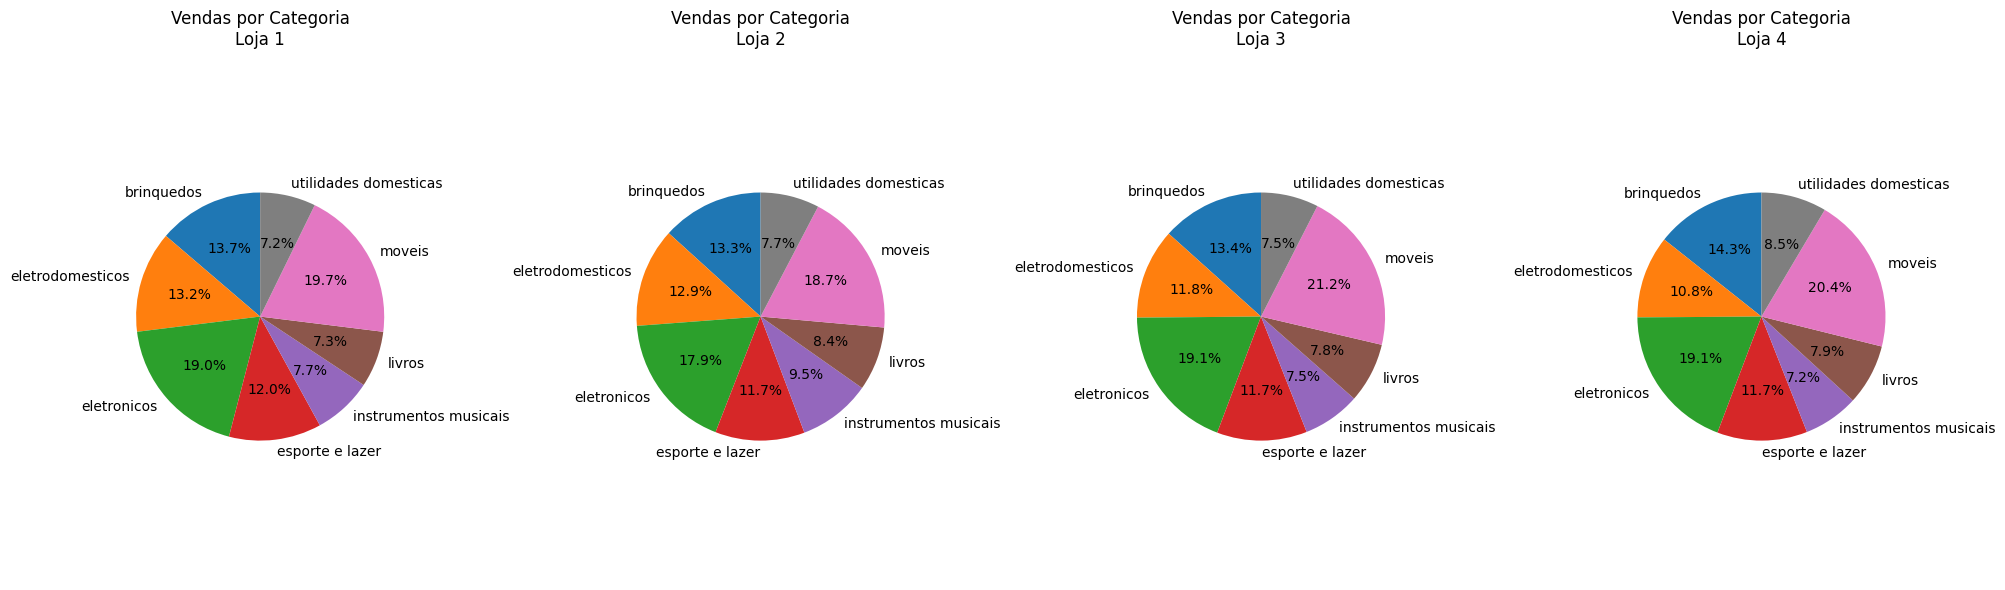

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Suas variáveis já calculadas
categoria1 = vendas_por_categoria
categoria2 = vendas_por_categoria2
categoria3 = vendas_por_categoria3
categoria4 = vendas_por_categoria4

# Criando DataFrame com todas as lojas
df_vendas = pd.DataFrame({
    'Loja 1': categoria1,
    'Loja 2': categoria2,
    'Loja 3': categoria3,
    'Loja 4': categoria4
}).fillna(0)

# Criando uma figura com 4 subgráficos (1 linha, 4 colunas)
fig, axes = plt.subplots(1, 4, figsize=(20, 6))

# Lista de lojas e eixos
lojas = df_vendas.columns

for i, loja in enumerate(lojas):
    axes[i].pie(
        df_vendas[loja],
        labels=df_vendas.index,
        autopct='%1.1f%%',
        startangle=90
    )
    axes[i].set_title(f'Vendas por Categoria\n{loja}')
    axes[i].axis('equal')  # deixa o gráfico perfeitamente circular

plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas


In [ ]:
import pandas as pd

# Re-load 'loja' as a DataFrame to ensure it's not a string
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
loja = pd.read_csv(url)

media = loja['Avaliação da compra'].mean()
print(media)

3.976685036032217


In [ ]:

media = sum(loja2['Avaliação da compra']) / len(loja2['Avaliação da compra'])
media



4.037303942348453

In [ ]:
media = sum(loja3['Avaliação da compra']) / len(loja3['Avaliação da compra'])
media


4.048325561678677

In [ ]:
media = sum(loja4['Avaliação da compra']) / len(loja4['Avaliação da compra'])
media



3.9957591178965224

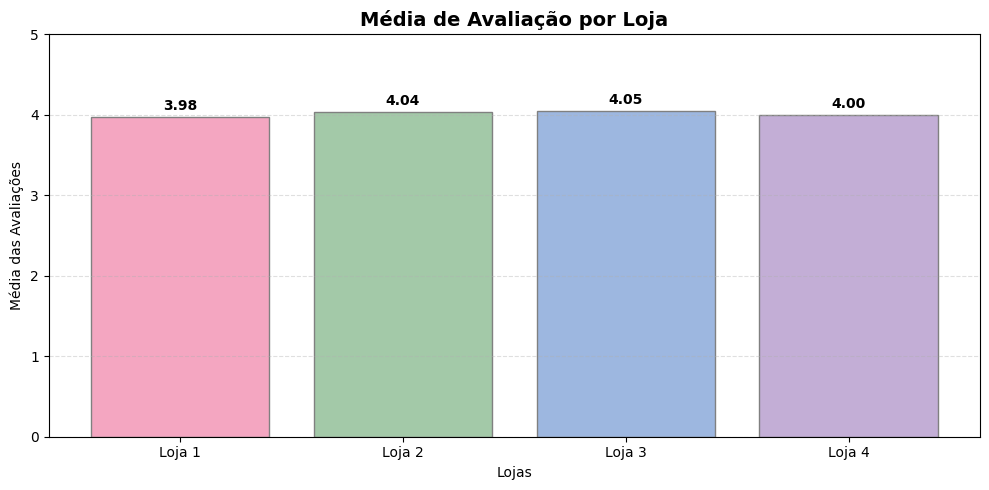

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Cálculo das médias de avaliação das lojas
media_1 = loja['Avaliação da compra'].mean()
media_2 = loja2['Avaliação da compra'].mean()
media_3 = loja3['Avaliação da compra'].mean()
media_4 = loja4['Avaliação da compra'].mean()

# Criação do DataFrame com as médias
df_medias = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Média Avaliação': [media_1, media_2, media_3, media_4]
})

# Paleta de cores harmonizada
cores = ['#F4A6C1', '#A3C9A8', '#9DB7E0', '#C3AED6']

plt.figure(figsize=(10, 5))
bars = plt.bar(
    df_medias['Loja'],
    df_medias['Média Avaliação'],
    color=cores,
    edgecolor='gray'
)

plt.title('Média de Avaliação por Loja', fontsize=14, fontweight='bold')
plt.xlabel('Lojas')
plt.ylabel('Média das Avaliações')

# Grade discreta
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Ajuste do limite do eixo Y para melhor visual
plt.ylim(0, 5)

# Adicionando os valores acima das colunas
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.05,
        f'{height:.2f}',
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

plt.show()

# 4. Produtos Mais e Menos Vendidos

In [7]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

df_lojas = pd.concat([loja, loja2, loja3, loja4], keys=['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'], names=['Loja_id', None]).reset_index(level='Loja_id')

# Agrupa as vendas de todas as lojas por categoria
categorias_geral = df_lojas.groupby('Categoria do Produto').size().reset_index(name='vendas_totais').sort_values('vendas_totais', ascending=False)

display(categorias_geral)

,Categoria do Produto,vendas_totais
6,moveis,1886
2,eletronicos,1772
0,brinquedos,1290
1,eletrodomesticos,1149
3,esporte e lazer,1113
4,instrumentos musicais,753
5,livros,742
7,utilidades domesticas,730


# 5. Frete Médio por Loja

In [8]:
# 6. Custo médio de frete
frete_medio = df_lojas.groupby('Loja_id')['Frete'].mean().reset_index(name='custo_medio_frete').sort_values('custo_medio_frete', ascending=False).round(2)

display(frete_medio)


,Loja_id,custo_medio_frete
0,Loja 1,34.69
1,Loja 2,33.62
2,Loja 3,33.07
3,Loja 4,31.28


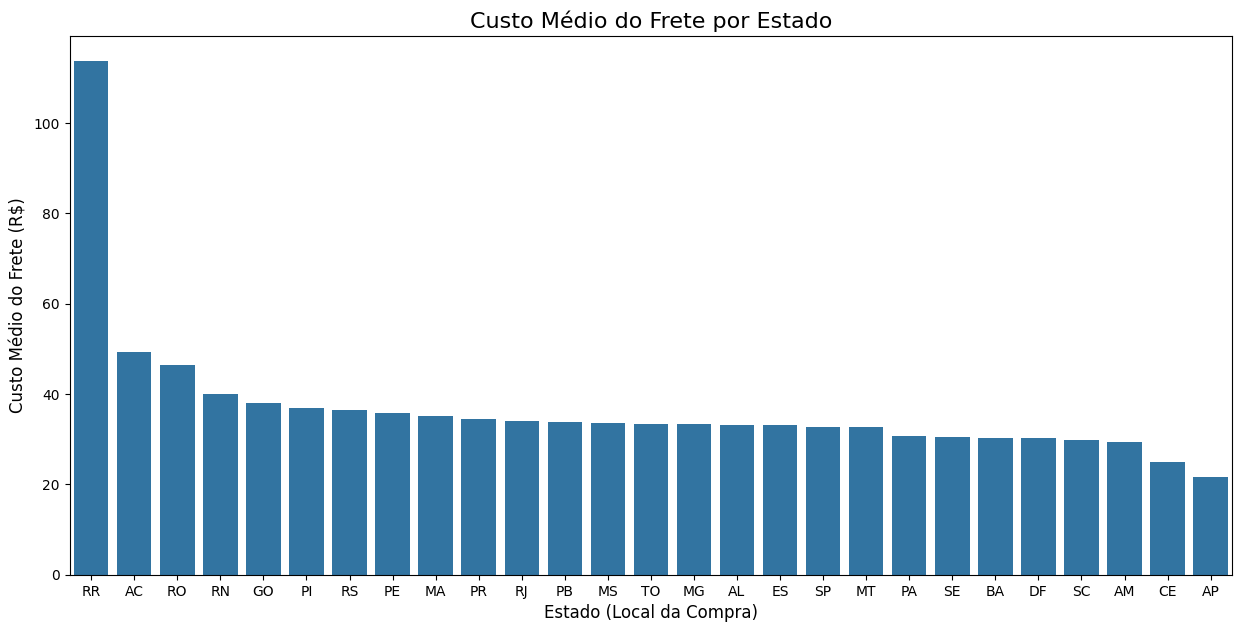

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupa por Local da compra e calcula a MÉDIA do Frete
frete_por_estado = df_lojas.groupby('Local da compra')['Frete'].mean().reset_index()

frete_por_estado_sorted = frete_por_estado.sort_values('Frete', ascending=False)

plt.figure(figsize=(15, 7))
sns.barplot(
    data=frete_por_estado_sorted,
    x='Local da compra',
    y='Frete'
)


plt.title('Custo Médio do Frete por Estado', fontsize=16)
plt.xlabel('Estado (Local da Compra)', fontsize=12)
plt.ylabel('Custo Médio do Frete (R$)', fontsize=12)
plt.show()

# 6. Análise de Sazonalidade


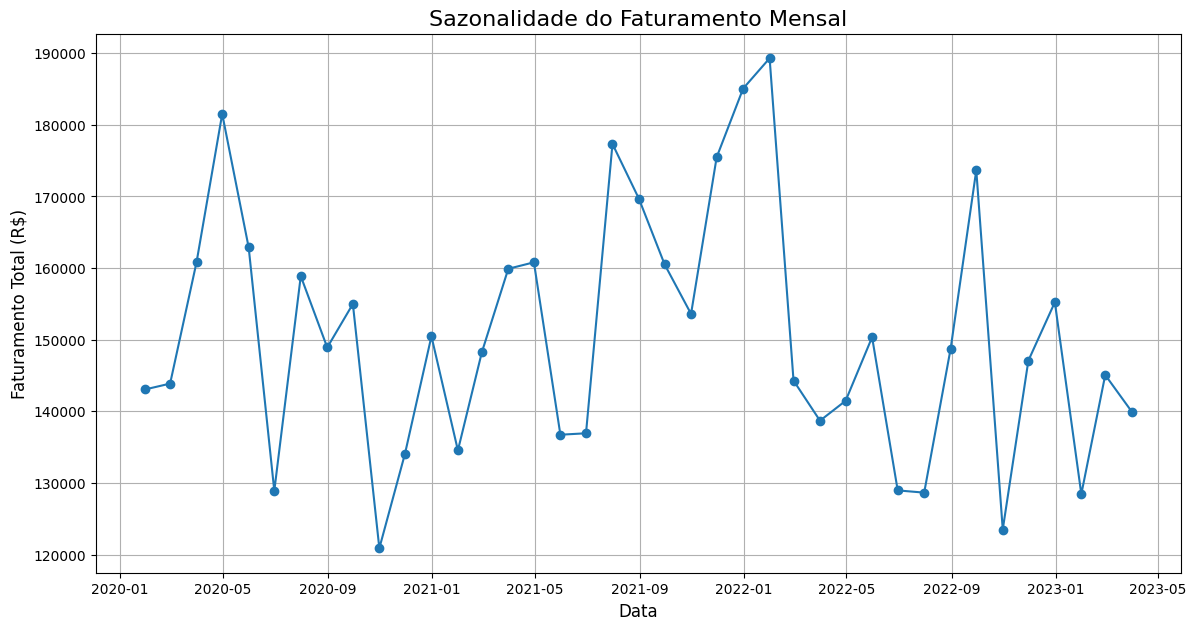

In [15]:
plt.figure(figsize=(14, 7))
plt.plot(
    faturamento_mensal.index,
    faturamento_mensal.values,
    marker='o'
)
plt.title('Sazonalidade do Faturamento Mensal', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Faturamento Total (R$)', fontsize=12)
plt.grid(True)
plt.show()


# Relatório de Desempenho da Rede AluraStore


## Relatório de Análise de Desempenho – Rede AluraStore

**Base de dados:** DataFrame `df_lojas`, composto por **9.435 registros de vendas** consolidados das quatro unidades da rede.
**Objetivo do estudo:** Analisar o desempenho financeiro e operacional das lojas, fornecendo subsídios técnicos para a tomada de decisão estratégica quanto à possível venda de uma unidade.

---

## 1. Faturamento Total por Loja

O faturamento total foi utilizado como principal indicador de desempenho financeiro.

| Loja   | Faturamento Total | Posição |
| ------ | ----------------- | ------- |
| Loja 1 | R$ 1.534.509,12   | 1º      |
| Loja 2 | R$ 1.488.459,06   | 2º      |
| Loja 3 | R$ 1.464.025,03   | 3º      |
| Loja 4 | R$ 1.384.497,58   | 4º      |

**Conclusão:**
A **Loja 4** apresenta o menor faturamento da rede, com receita aproximadamente **R$ 150.000 inferior à Loja 1**, o que representa uma diferença próxima de **11%** em relação à unidade líder.

---

## 2. Média de Avaliação dos Clientes

Foi analisado o nível de satisfação dos clientes por meio das avaliações médias registradas.

* **Maior avaliação:** Loja 3 – **4.05**
* **Menor avaliação:** Loja 1 – **3.98**
* **Loja 4:** Avaliação intermediária – **4.00**

**Análise:**
Mesmo apresentando o menor faturamento, a **Loja 4 mantém uma percepção positiva por parte dos clientes**. Em contrapartida, a **Loja 1**, apesar de liderar em receita, registra a **menor média de satisfação**, o que pode sinalizar gargalos na experiência do consumidor.

---

## 3. Custo Médio de Frete por Loja

O custo logístico foi avaliado por seu impacto direto na margem operacional.

| Loja   | Custo Médio de Frete |
| ------ | -------------------- |
| Loja 1 | R$ 34,69             |
| Loja 2 | R$ 33,17             |
| Loja 3 | R$ 32,58             |
| Loja 4 | R$ 31,28             |

**Análise:**
A **Loja 4** apresenta o **menor custo médio de frete**, indicando maior eficiência logística.
Por outro lado, a **Loja 1** possui o frete mais elevado da rede, o que pode comprometer sua rentabilidade.

---

## 4. Análise de Categorias e Produtos (Visão Consolidada da Rede)

A avaliação por categorias e produtos permite identificar os principais impulsionadores de receita e volume.

### Faturamento por Categoria

| Categoria        | Participação no Faturamento |
| ---------------- | --------------------------- |
| Eletrônicos      | 37,7%                       |
| Eletrodomésticos | 30,1%                       |
| Móveis           | 17,2%                       |

**Observação:**
Essas três categorias concentram **85% do faturamento total da rede**, evidenciando alta dependência desses segmentos.

### Volume de Unidades Vendidas

| Categoria   | Unidades Vendidas |
| ----------- | ----------------- |
| Móveis      | 1.886             |
| Eletrônicos | 1.772             |
| Brinquedos  | 1.290             |

**Interpretação:**
Produtos de **maior valor agregado**, como eletrônicos e eletrodomésticos, são os principais responsáveis pelo faturamento, enquanto a categoria **móveis se destaca pelo alto volume de vendas**, mesmo com ticket médio inferior.

---

## 5. Avaliação de Cenários Estratégicos

Com base nos indicadores analisados, foram estruturados dois cenários estratégicos.

### Cenário 1 – Venda da Loja de Menor Desempenho Financeiro

**Recomendação:** Venda da **Loja 4**
**Justificativa:** Trata-se da unidade com **menor faturamento da rede**.
Sua alienação minimizaria o impacto na receita consolidada e possibilitaria a **realocação estratégica de capital**.
**Ponto de atenção:** A Loja 4 apresenta **frete mais econômico** e **avaliação satisfatória dos clientes**.

---

### Cenário 2 – Venda da Loja com Maiores Desafios Operacionais

**Alternativa:** Venda da **Loja 1**
**Justificativa:** Caso o objetivo seja **maximizar o retorno financeiro imediato**, a Loja 1 possui o **maior faturamento (R$ 1,53M)** e, consequentemente, maior valor de mercado.
**Ponto de atenção:** É também a unidade com **maior custo de frete** e **menor avaliação dos clientes**, o que pode indicar fragilidades operacionais.

---

## Recomendação Final

Após a consolidação de todas as análises financeiras e operacionais, conclui-se que:

👉 **A alternativa mais segura e racional é a venda da Loja 4.**

* Apresenta o **menor faturamento da rede (R$ 1,38M)**
* Sua saída gera o **menor impacto na receita total**
* A decisão contribui para a **otimização do portfólio**, redução de custos e **reinvestimento em unidades mais rentáveis**

---

## Resumo Executivo

| Indicador             | Melhor Loja       | Pior Loja         |
| --------------------- | ----------------- | ----------------- |
| Faturamento Total     | Loja 1 (R$ 1,53M) | Loja 4 (R$ 1,38M) |
| Avaliação de Clientes | Loja 3 (4.05)     | Loja 1 (3.98)     |
| Custo Médio de Frete  | Loja 4 (R$ 31,28) | Loja 1 (R$ 34,69) |

